# HiFormer

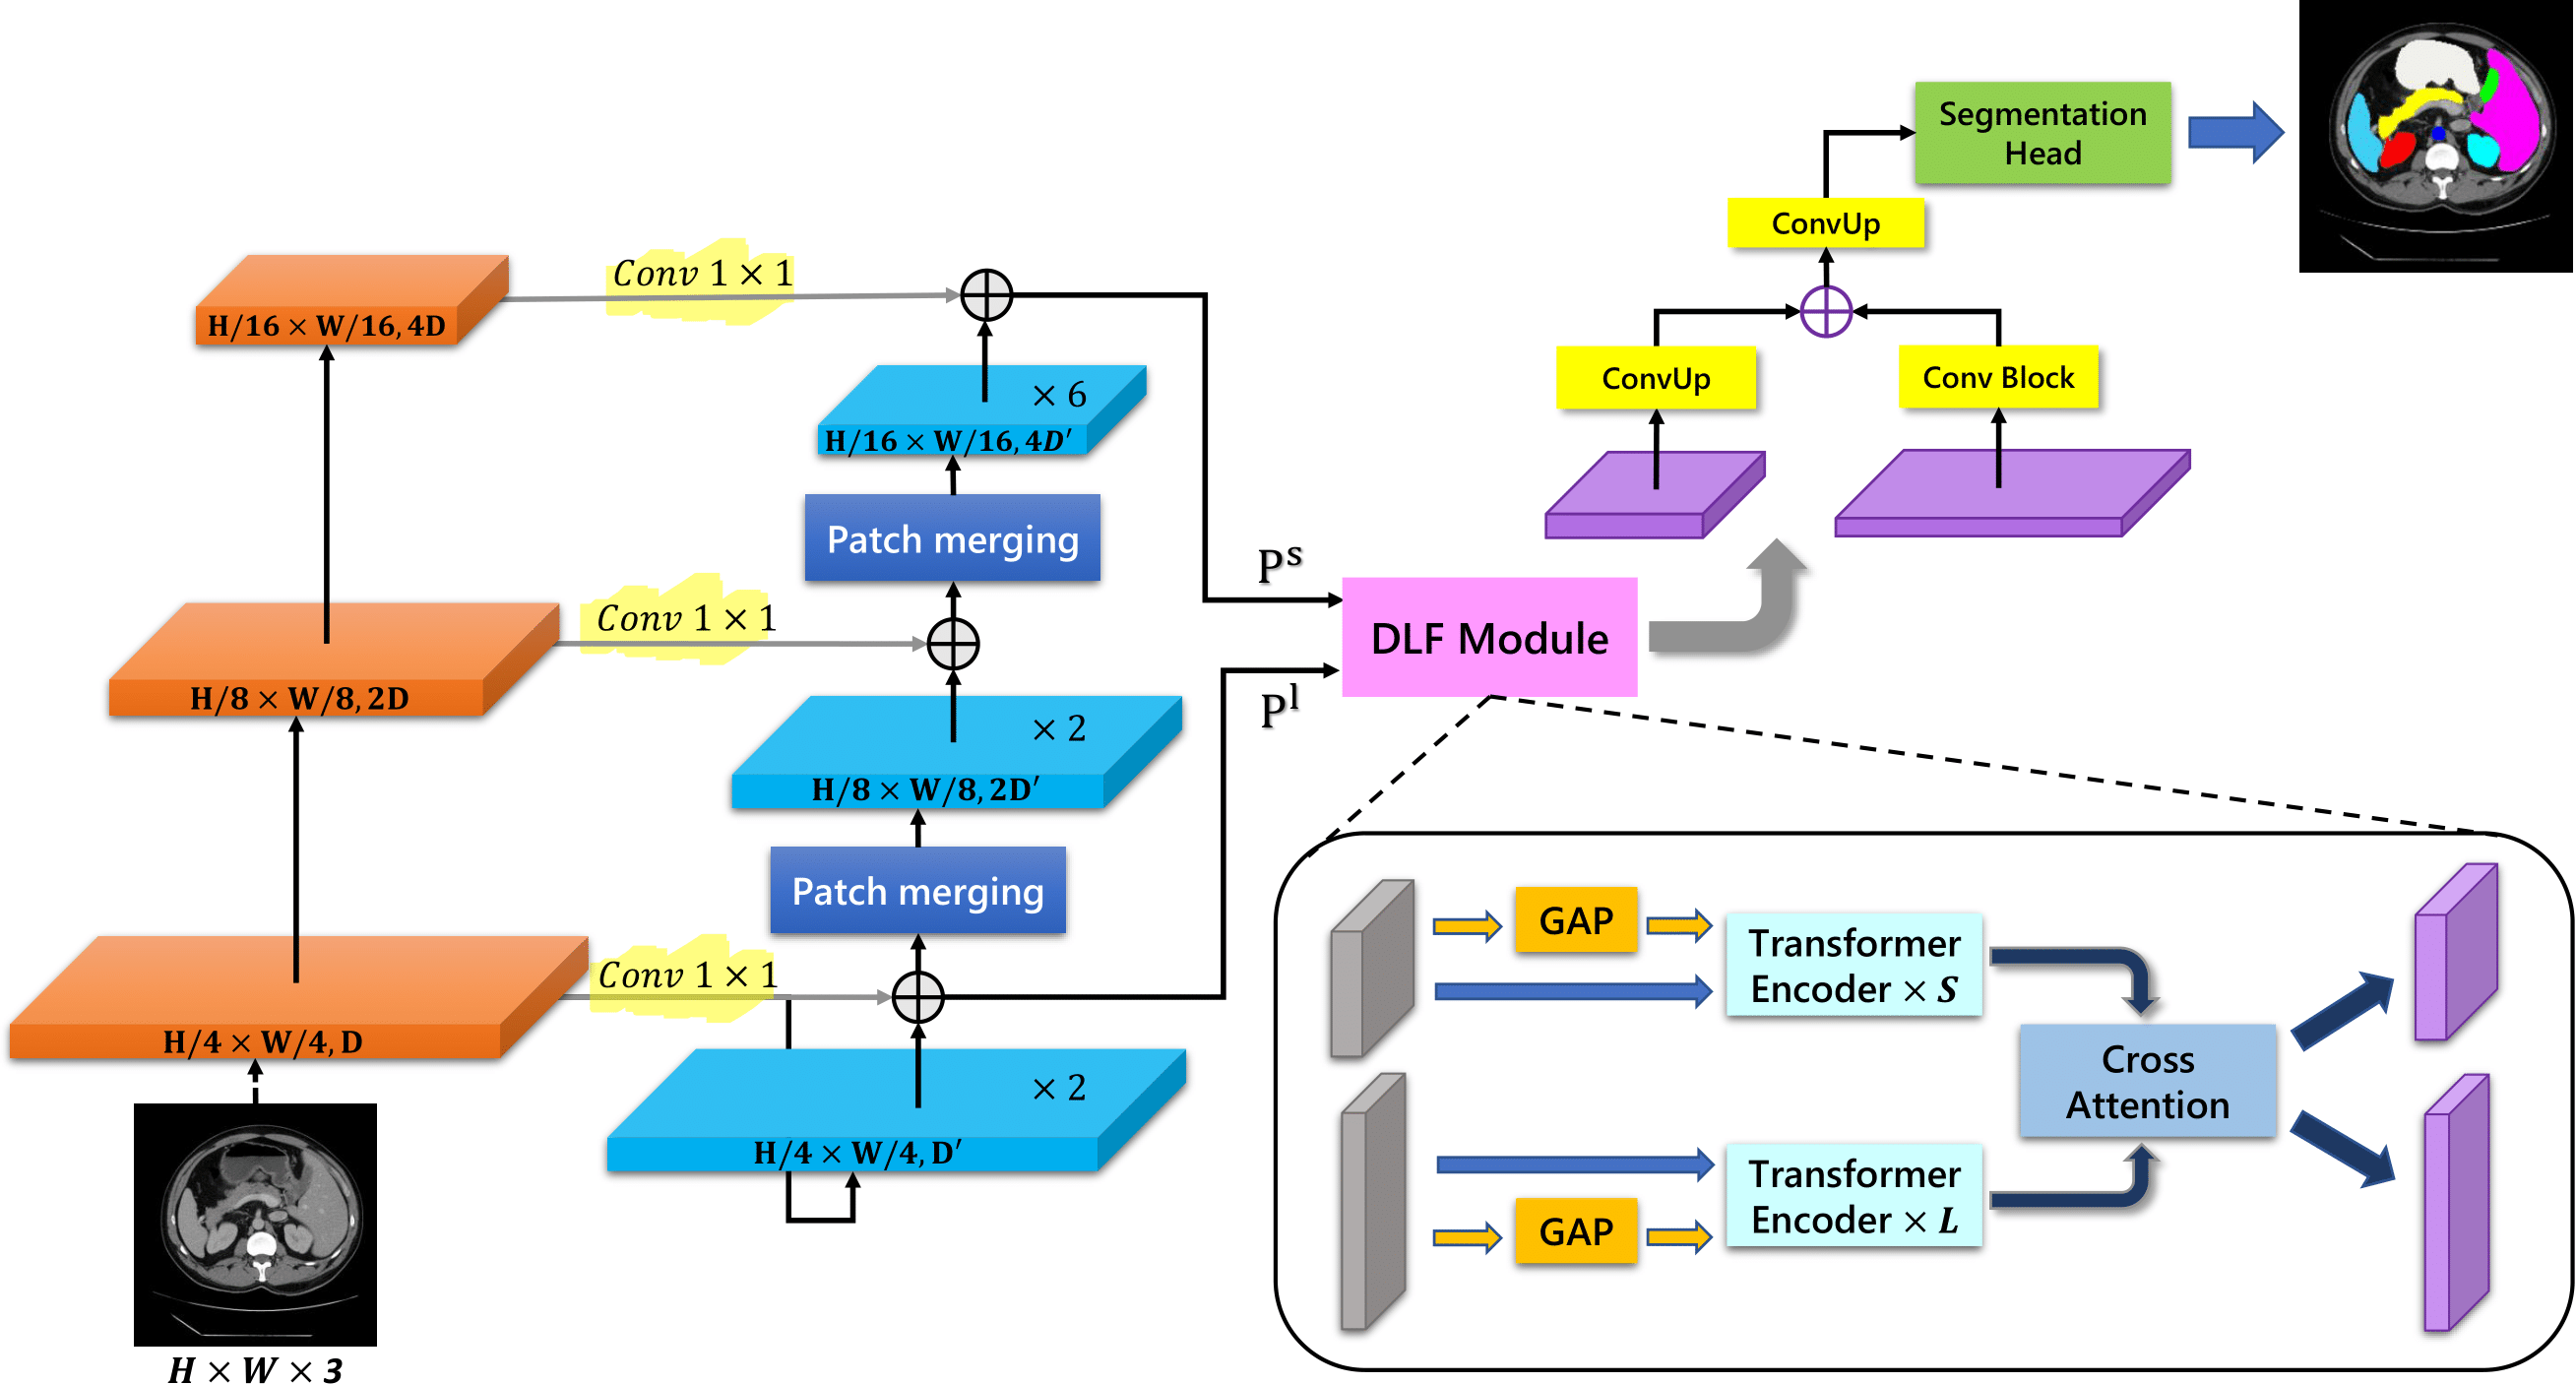

## 1)  Clone the repository and download the Synapse dataset

In [3]:
!git clone https://github.com/amirhossein-kz/HiFormer.git
%cd /content/HiFormer

Cloning into 'HiFormer'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 499 (delta 68), reused 25 (delta 21), pack-reused 397
Receiving objects: 100% (499/499), 6.33 MiB | 11.38 MiB/s, done.
Resolving deltas: 100% (311/311), done.
/content/HiFormer


In [4]:
!gdown 18I9JHH_i0uuEDg-N6d7bfMdf7Ut6bhBi
!unzip -xq ./data.zip

Downloading...
From: https://drive.google.com/uc?id=18I9JHH_i0uuEDg-N6d7bfMdf7Ut6bhBi
To: /content/HiFormer/data.zip
100% 610M/610M [00:05<00:00, 106MB/s]


## 2) Install Prerequisites

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.1 MB/s eta 0:00:00
  Created wheel for ml_collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94507 sha256=4a56b4b93964ef91d773d12cdae1e6436cf629160e4cb71e20e1f5f42ad1dd7d
  Stored in directory: /root/.cache/pip/wheels/7b/89/c9/a9b8779

## 3) Train Code

- **--root_path**     [Train data path]
- **--test_path**     [Test data path]
- **--eval_interval** [Evaluation epoch]
- **--model_name**    [Choose from [hiformer-s, hiformer-b, hiformer-l]]

In [8]:
!python train.py --root_path ./data/Synapse/train_npz --test_path ./data/Synapse/test_vol_h5 --batch_size 10 --eval_interval 20 --max_epochs 400 --model_name hiformer-l --num_workers 2

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Traceback (most recent call last):
  File "/content/HiFormer/train.py", line 80, in <module>
    model = HiFormer(config=CONFIGS[args.model_name], img_size=args.img_size, n_classes=args.num_classes).cuda()
  File "/content/HiFormer/models/HiFormer.py", line 14, in __init__
    self.All2Cross = All2Cross(config = config, img_size= img_size, in_chans=in_chans)
  File "/content

## 3) Test Code

- **--test_path**     [Test data path]
- **--model_name**    [Choose from [hiformer-s, hiformer-b, hiformer-l]]
- **--is_savenii**    [Whether to save results during inference]
- **--model_weight**  [HiFormer trained model path]

In [ ]:
!python test.py --test_path ./data/Synapse/test_vol_h5 --model_name hiformer-b --is_savenii --model_weight './results/hiformer-b/hiformer-b_best.pth'